In [56]:
library(Seurat)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [87]:
data_dir <- '/data/APAproject//post_qual//data//Alexandra_Grubman/from_paper/'
setwd(data_dir)
counts <- read.table('counts.tsv',sep='\t',header = T)
rownames(counts) = counts$geneName
counts <- counts[,2:dim(counts)[2]]
metadata <- read.table('scmetadata.tsv',sep='\t', header=T)
rownames(metadata) <- metadata$sampleID
so <- CreateSeuratObject(counts,project='Alexandra_G',assay="RNA")
so <- AddMetaData(so, metadata)
UMAP_coordinates_from_study = data.frame(UMAP_1 = so$UMAP1_ALL,UMAP_2 =so$UMAP2_ALL)

## Process the object

In [88]:
so[["percent.mt"]] <- PercentageFeatureSet(so, pattern = "^MT-")

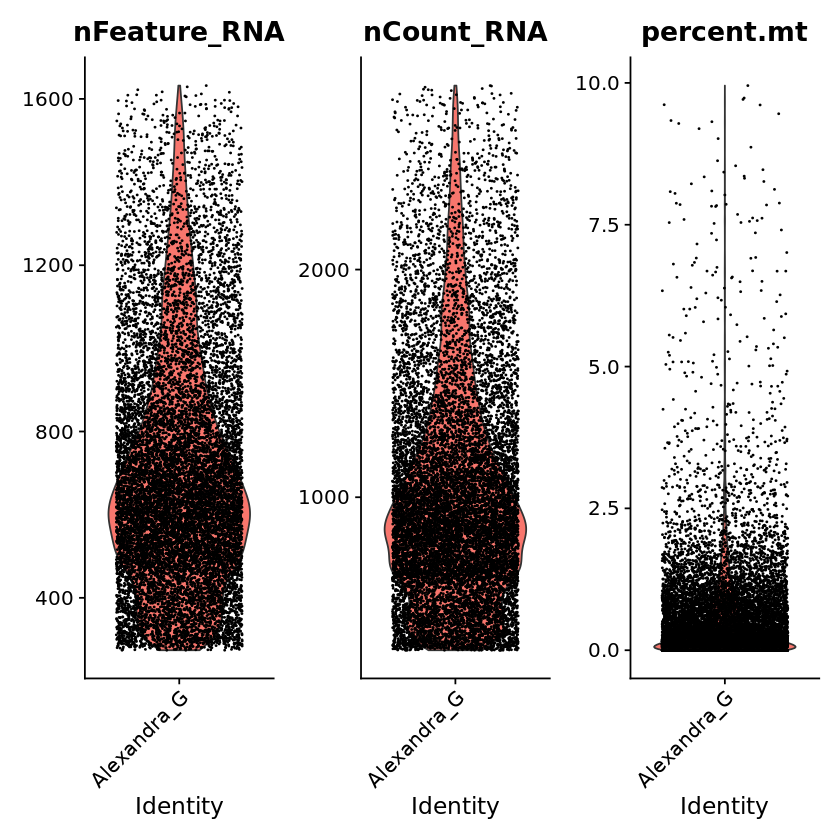

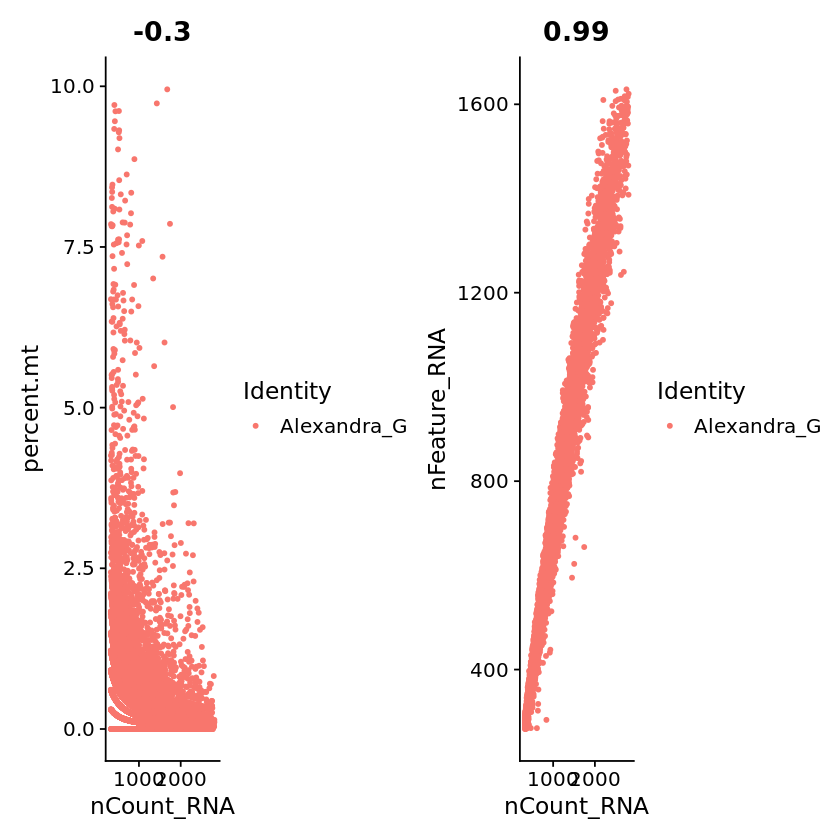

In [93]:
VlnPlot(so, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3) 
plot1 <- FeatureScatter(so, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(so, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
combind <- plot1 + plot2
combind

In [94]:
## no need to subset MT%
so <- NormalizeData(so, normalization.method = "LogNormalize", scale.factor = 10000)

In [95]:
so <- FindVariableFeatures(object = so, selection.method = "vst", nfeatures = 2000)
so <- ScaleData(so, features = rownames(so), vars.to.regress = c("percent.mt"))

Regressing out percent.mt

Centering and scaling data matrix



PC_ 1 
Positive:  SPP1, LINC01608, CNDP1, KCNMB4, KIRREL3, PALM2, SYNJ2, CDH19, SLC5A11, CNTNAP4 
	   PDE1A, ADAMTS18, RP11-81H3.2, TMTC4, GLDN, RP11-267C16.1, LRP2, VRK2, KLHL4, LINGO1 
	   LINC01170, APOD, CHN2, HS3ST5, BOK, RP11-50D16.4, CD55, LAMA2, ST6GALNAC3, KIF6 
Negative:  NRG3, GPM6A, NRXN1, RORA, SLC1A2, NKAIN3, DPP10, GPC5, CTNNA2, ADGRV1 
	   RP11-384F7.2, FAM155A, DTNA, NEBL, RNF219-AS1, PITPNC1, LSAMP, NRCAM, GABRB1, NTRK2 
	   SOX5, FMN2, TRPM3, SPARCL1, PTPRZ1, RYR3, TENM2, ADCY2, CACNB2, CSGALNACT1 
PC_ 2 
Positive:  OPCML, SNTG1, FGF14, CSMD1, DSCAM, PCDH15, KCNIP4, LHFPL3, TNR, NXPH1 
	   FGF12, LUZP2, GRIK2, ATRNL1, LRRTM4, MMP16, GRIK1, GRM7, CA10, CSMD3 
	   MDGA2, RP4-668E10.4, SGCZ, KCND2, RBFOX1, GRID2, XKR4, SCN1A, RIMS2, GRM5 
Negative:  RNF219-AS1, ADGRV1, RYR3, TPD52L1, GLIS3, AQP4, BMPR1B, EMX2, LINC00499, PRKG1 
	   LRRC16A, ETNPPL, NEAT1, SLC1A3, TRPM3, PTGDS, RANBP3L, PAMR1, STON2, GPC5 
	   SLC4A4, SLC14A1, SFXN5, ZNRF3, AC002429.5, GLI3, COL5A3, SLC1

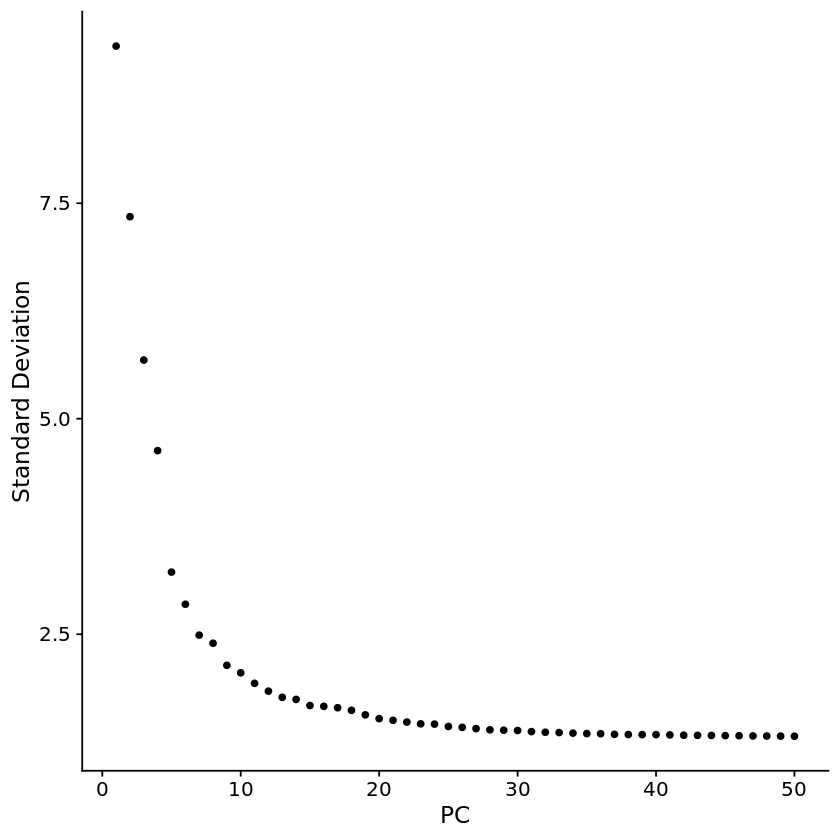

In [96]:
so <- RunPCA(so, features = VariableFeatures(object = so))
ElbowPlot(so,ndims=50) ##find the true dimensionality of data

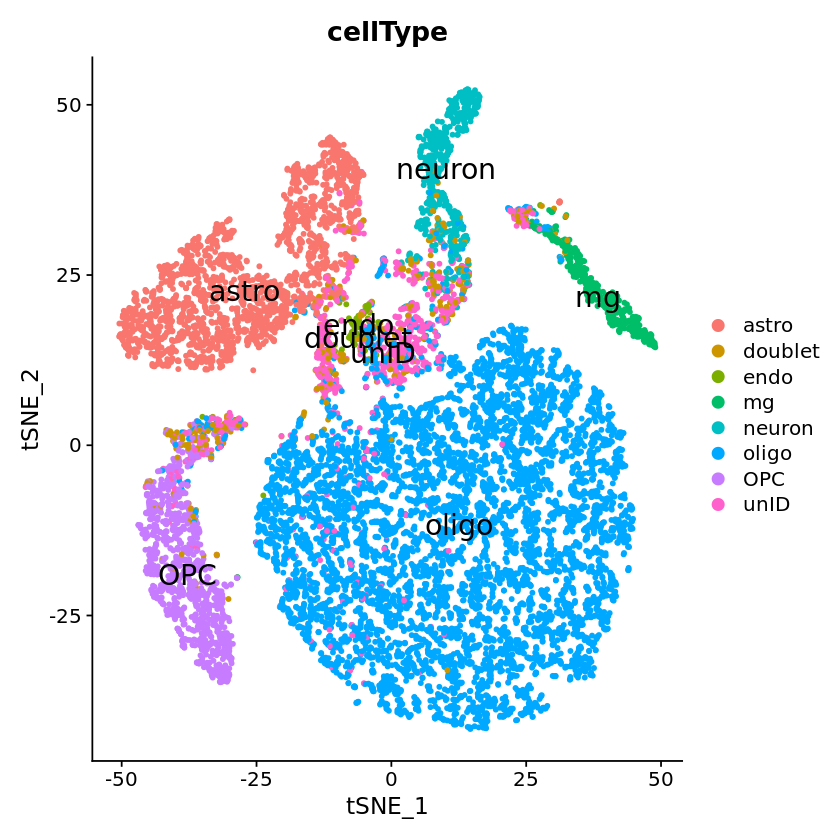

In [99]:
# so <- FindNeighbors(object = so ,  dims = 1:30) ##dims based on the pcas
# so <- FindClusters(object = so, reduction.type = "pca" , resolution = 0.5) 
# so = RunTSNE(so)
DimPlot(object = so, pt.size = 1, reduction = "tsne", group.by = 'cellType', label = T, label.size=6)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
20:30:28 UMAP embedding parameters a = 0.9922 b = 1.112

20:30:28 Read 13214 rows and found 30 numeric columns

20:30:28 Using Annoy for neighbor search, n_neighbors = 30

20:30:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:30:30 Writing NN index file to temp file /tmp/RtmpAVs74L/file4ac71fd9287f

20:30:30 Searching Annoy index using 1 thread, search_k = 3000

20:30:34 Annoy recall = 100%

20:30:35 Commencing smooth kNN distance calibration using 1 thread

20:30:36 Initializing fr

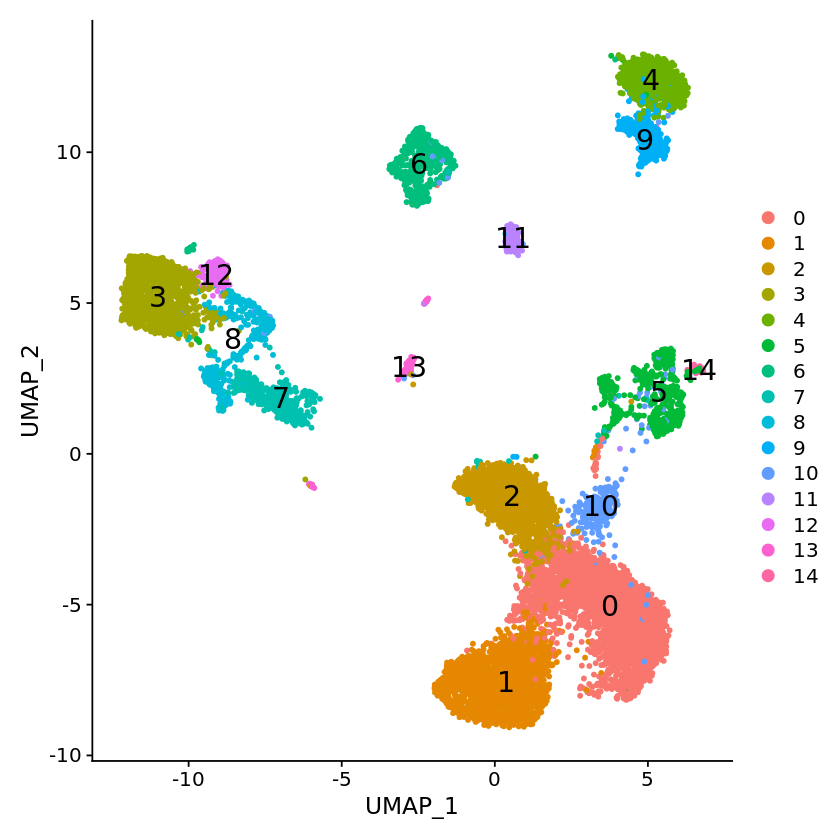

In [100]:
so <- RunUMAP(so , dims = 1:30)    ##parameteres need to be set
DimPlot(so, reduction = "umap",label=T,pt.size=1,label.size=6)

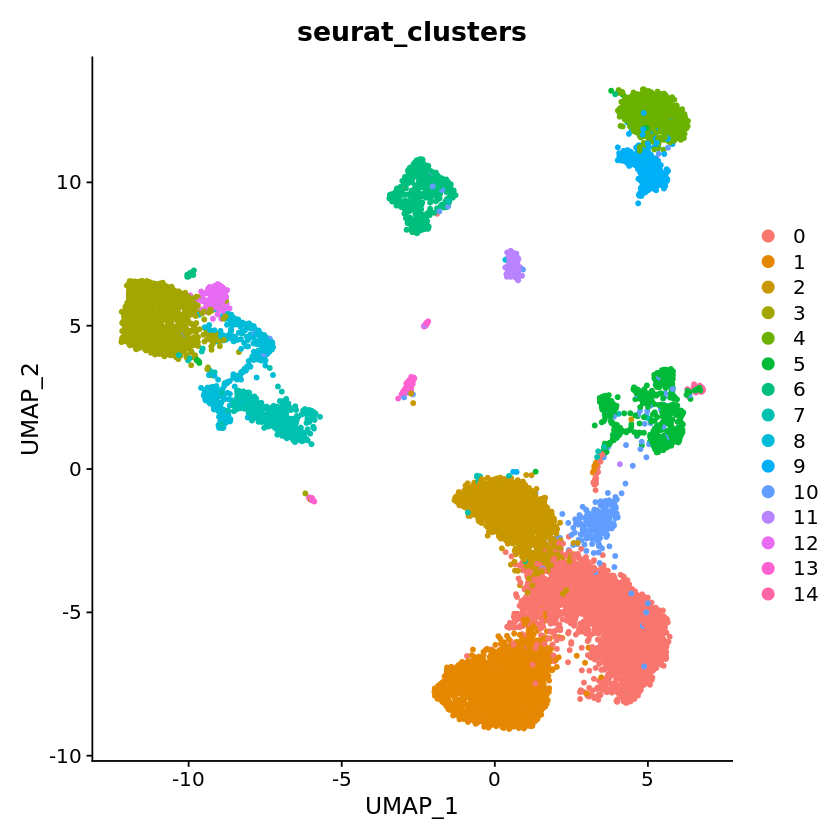

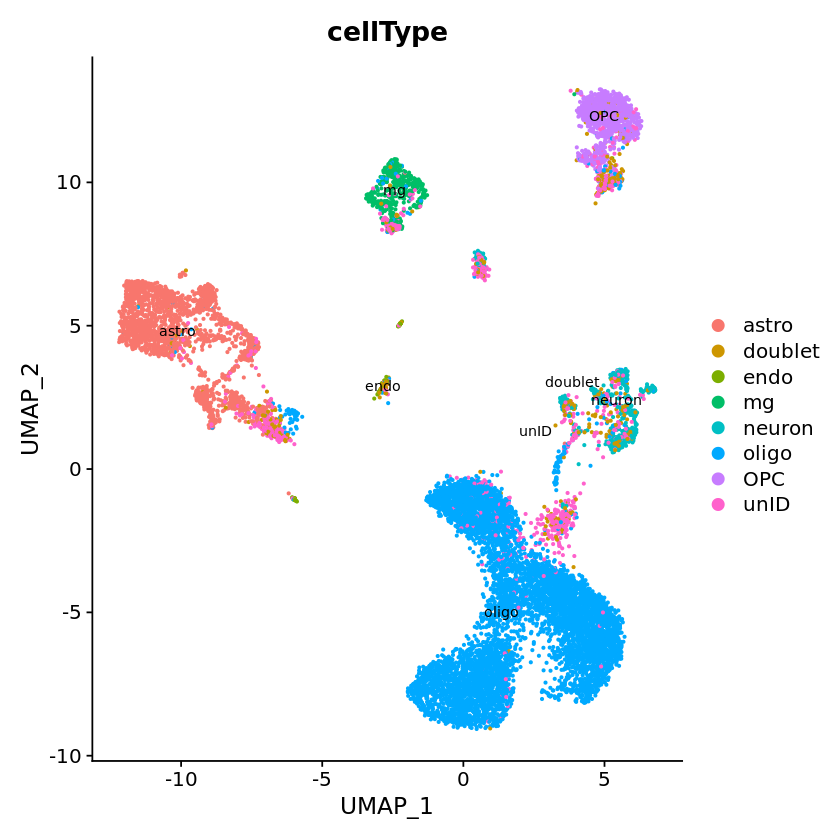

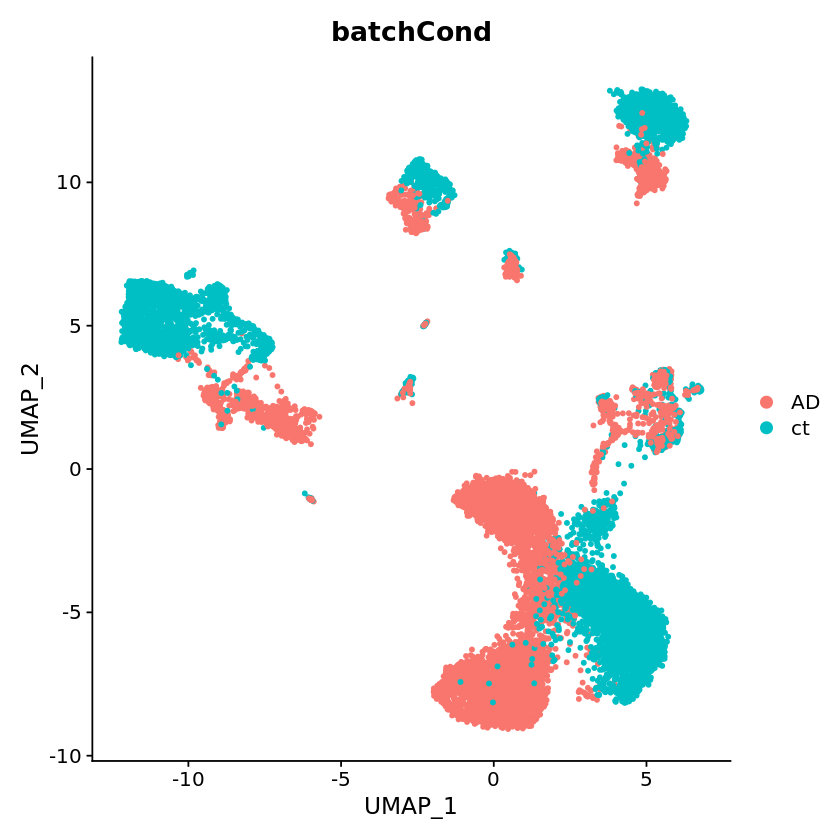

In [106]:
DimPlot(so, reduction = "umap", group.by = 'seurat_clusters' ,pt.size=1,label.size=6)
DimPlot(so, reduction = "umap", group.by = 'cellType',pt.size= 0.5,label = T, label.size=3)
DimPlot(so, reduction = "umap", group.by = 'batchCond' ,pt.size=1,label.size=6)

In [ ]:
so$seurat_clusters

In [107]:
library(Sierra)

Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"


In [108]:
browseVignettes("Sierra")

No vignettes found by browseVignettes("Sierra")



In [118]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
junctions.file <- '/data/APAproject/post_qual/data/Alexandra_Grubman/Raw_and_pre_processed/SRR10278808_Cellranger_out/outs/tst.bed'
bamfile <- '/data/APAproject/post_qual/data/Alexandra_Grubman/Raw_and_pre_processed/SRR10278808_Cellranger_out/outs/possorted_genome_bam.bam'
whitelist.file <- '/data/APAproject/post_qual/data/Alexandra_Grubman/Raw_and_pre_processed/SRR10278808_Cellranger_out/outs/filtered_feature_bc_matrix/barcodes.tsv'

In [116]:
peak.output.file <- "test_sierra_run.txt"
FindPeaks(output.file = peak.output.file,      # output filename
          gtf.file = reference.file,           # gene model as a GTF file
          bamfile = bamfile,                   # BAM alignment filename.
          junctions.file = junctions.file,     # BED filename of splice junctions exising in BAM file. 
          ncores = 10)                          # number of cores to use

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK

36601 gene entries to process

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as

In [119]:
count.dir <- "test_sierra_counts"
CountPeaks(peak.sites.file = peak.output.file, 
           gtf.file = reference.file,
           bamfile = bamfile, 
           whitelist.file = whitelist.file,
           output.dir = count.dir,
           countUMI = TRUE, 
           ncores = 16)

There are 2757 whitelist barcodes.

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK

There are 3214  sites

Doing counting for each site...



In [120]:
# Human genome (hg38) - not required for this vignette
BiocManager::install("BSgenome.Hsapiens.UCSC.hg38")


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'BSgenome.Hsapiens.UCSC.hg38'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'curl', 'isoband', 'RSQLite', 'spatstat.geom'



In [122]:
genome <- BSgenome.Hsapiens.UCSC.hg38::BSgenome.Hsapiens.UCSC.hg38

AnnotatePeaksFromGTF(peak.sites.file = peak.output.file, 
                     gtf.file = reference.file,
                     output.file = "Test_Sierra_peak_annotations.txt", 
                     genome = genome)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



[1] "Annotating  3214  peak coordinates."
[1] "'chr' character(s) already preceding chromosome name for 25 chromosomes. Will skip adding 'chr' characters for this chromosome set. Set check.chr=FALSE if the addition of 'chr' characters is required."
[1] "The following chromosome names are present in the peak file, but not in the genome file, and will not be annotated: KI270734.1"

Annotating 3' UTRs
Annotating 5' UTRs
Annotating introns
Annotating exons
Annotating CDS
Analysing genomic motifs surrounding peaks (this can take some time)
  |======================================================================| 100%


In [123]:
peak.counts <- ReadPeakCounts(data.dir = "test_sierra_counts")
#Read in peak annotations
peak.annotations <- read.table("Test_Sierra_peak_annotations.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)
head(peak.annotations)

,seqnames,start,end,width,strand,gene_id,UTR3,UTR5,intron,exon,CDS,pA_motif,pA_stretch,pT_stretch,Junctions
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<chr>
LAS1L:chrX:65512582-65512857:-1,chrX,65512582,65512857,276,-,LAS1L,YES,,,,,TRUE,FALSE,FALSE,no-junctions
M6PR:chr12:8940361-8940664:-1,chr12,8940361,8940664,304,-,M6PR,YES,,,,,FALSE,FALSE,FALSE,no-junctions
M6PR:chr12:8942960-8943350:-1,chr12,8942960,8943350,391,-,M6PR,,,YES,YES,,FALSE,TRUE,FALSE,no-junctions
RBM5:chr3:50118592-50118982:1,chr3,50118592,50118982,391,+,RBM5,YES,,,,,FALSE,FALSE,FALSE,no-junctions
RBM6:chr3:50075222-50077248:1,chr3,50075222,50077248,2027,+,RBM6,YES,,,,,TRUE,FALSE,FALSE,across-junctions
CFTR:chr7:117715150-117715408:1,chr7,117715150,117715408,259,+,CFTR,,,YES,,,FALSE,TRUE,FALSE,no-junctions


In [124]:
head(peak.counts)

   [[ suppressing 2757 column names 'AAACCTGAGACACGAC-1', 'AAACCTGAGCTATGCT-1', 'AAACCTGAGGAGCGTT-1' ... ]]



6 x 2757 sparse Matrix of class "dgTMatrix"
                                                                              
SLC25A5:chrX:119470916-119471354:1 . . . . . . . . . . . . . . . . . . . . . .
FHL1:chrX:136210969-136211359:1    . . . . . . . . . . . . . . . . . . . . . .
SCML1:chrX:17739465-17739861:1     . 1 . . . . . . . . . . . . . . . . . . . .
FAM50A:chrX:154450156-154450654:1  . . . . . . . . . . . . . . . . . . . . . .
ATP6AP1:chrX:154436123-154436516:1 . . . . . . . . . . . . . . . . . . . . . .
PAK3:chrX:111220522-111220942:1    . . . . . . . . . . . . . . . . . . . . . .
                                                                              
SLC25A5:chrX:119470916-119471354:1 . . . . . . . . . . . . . . . . . . . . . .
FHL1:chrX:136210969-136211359:1    1 . . . . . . . . . . . . . . . . . . . . .
SCML1:chrX:17739465-17739861:1     . . . . . . . . 1 1 . . 1 . . . . . . . . .
FAM50A:chrX:154450156-154450654:1  . . . . . . . 1 . . . . . . . . . . . . . 1
ATP6AP1:

In [125]:
peaks.seurat <- NewPeakSeurat(peak.data = peak.counts, 
                              annot.info = peak.annotations, 
                              min.cells = 0, min.peaks = 0)

[1] "Creating Seurat object with 3076 peaks and 2757 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "No t-SNE coodinates included"
[1] "No UMAP coordinates included"
